In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [90]:
# Find the most recent date in the data set.
session.query(func.max(measurement.date)).first()

('2017-08-23',)

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
mostRecent = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
oneYearAgo = mostRecent - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= oneYearAgo)
#for i in data:
    #print(i)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
naPrcpDF = pd.DataFrame(data, columns= ["Date", "Precipitation"])
prcpDF = naPrcpDF.dropna()

# Sort the dataframe by date
sortedPrcpDF = prcpDF.sort_values(by="Date")
#sortedPrcpDF


<Axes: xlabel='Date', ylabel='Inches'>

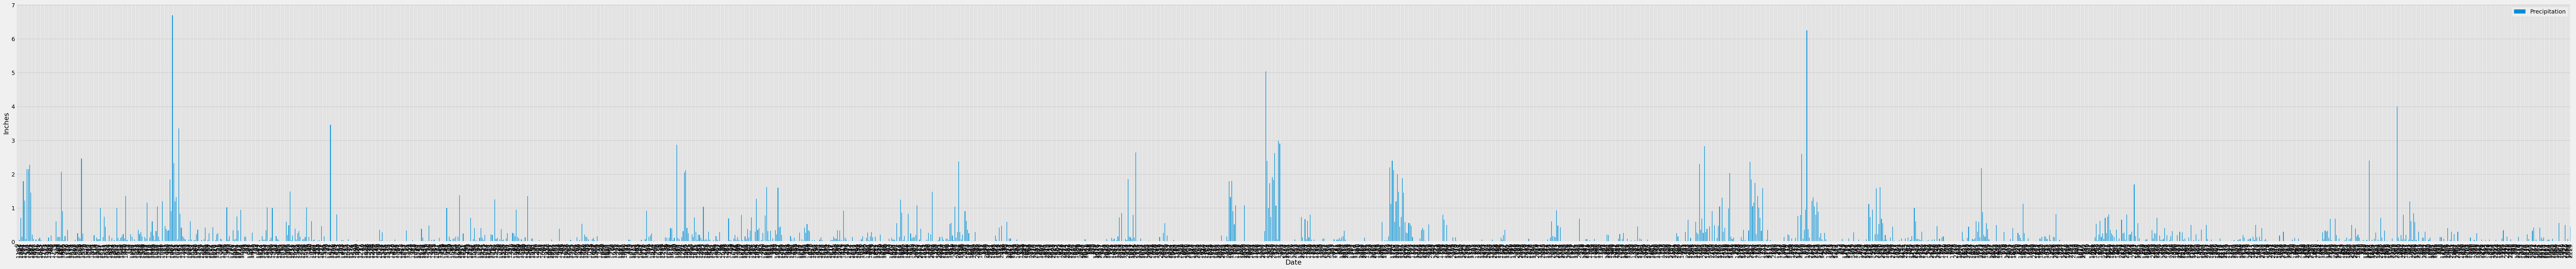

In [88]:
# Use Pandas Plotting with Matplotlib to plot the data
sortedPrcpDF.plot(kind='bar', xlabel='Date', ylabel='Inches', grid=True, figsize=(100,10))

In [70]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = sortedPrcpDF['Precipitation'].describe()
pd.DataFrame(summary)

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [140]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).distinct().count()

9

In [146]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [148]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [143]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
tempdata = session.query(measurement.tobs).filter(measurement.date >= oneYearAgo, measurement.station == 'USC00519281').all()


Text(0.5, 0, 'Temperature')

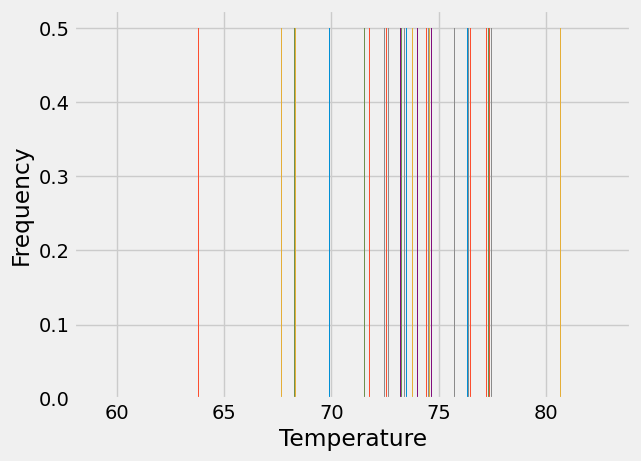

In [145]:
#plot the results as a histogram
plt.hist(tempdata, density=True, bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')

# Close Session

In [16]:
# Close Session
session.close()